In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, roc_curve, roc_auc_score 

In [35]:
concrete_data = pd.read_csv("Iris.csv")
column_names = concrete_data.columns
concrete_data = concrete_data.drop(column_names[0], axis = 1)

concrete_data.replace(to_replace="Iris-setosa", value=0, inplace=True)
concrete_data.replace(to_replace="Iris-versicolor", value=0, inplace=True)
concrete_data.replace(to_replace="Iris-virginica", value=1, inplace=True)

column_names = concrete_data.columns
concrete_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


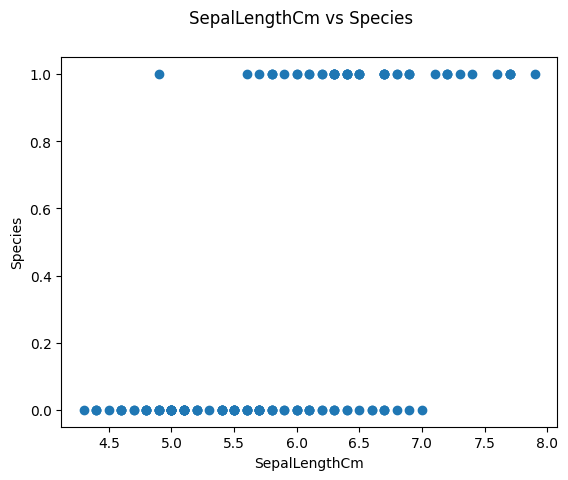

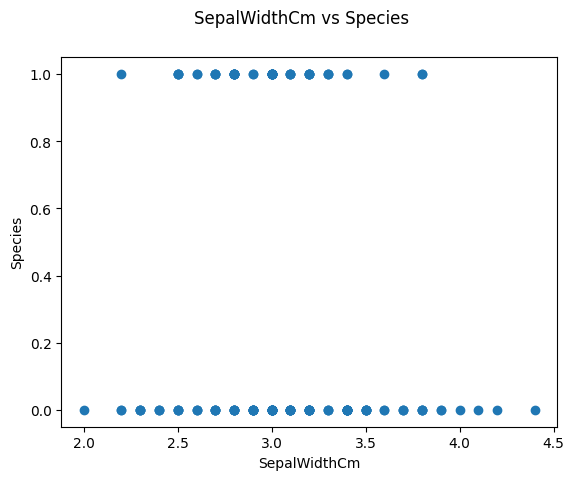

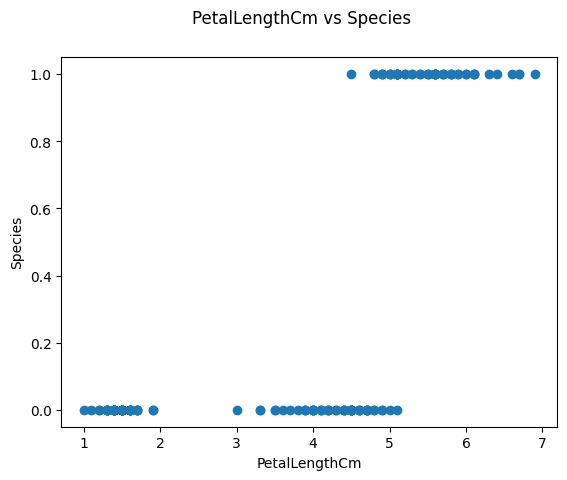

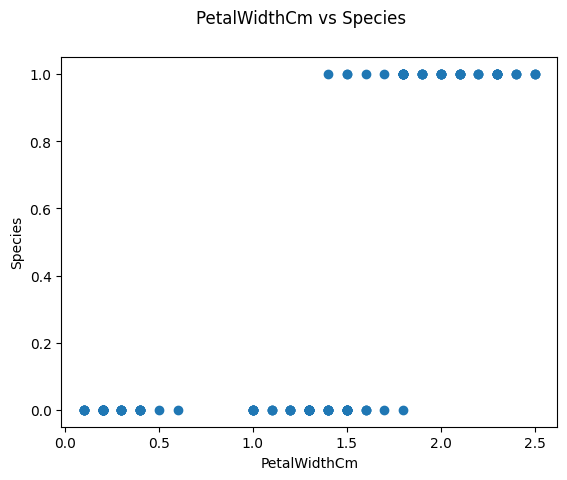

In [36]:
for column in column_names[:-1]:
    fig, ax = plt.subplots()
    ax.plot(concrete_data[column], concrete_data[column_names[-1]], 'o', label=column)
    fig.suptitle(column + " vs " + column_names[-1])
    ax.set_xlabel(column)
    ax.set_ylabel(column_names[-1])
    plt.show()

In [37]:
concrete_data = concrete_data.to_numpy()

x_train = concrete_data[:, :-1]
y_train = concrete_data[:, -1].reshape(-1, 1)

print(f"x_train dim : {x_train.shape}")
print(f"y_train dim : {y_train.shape}")

x_train dim : (150, 4)
y_train dim : (150, 1)


In [38]:
def sigmoid(z) :
    return 1 / (1 + np.exp(-z))

In [39]:
def cost_function(w, b, x_train, y_train) :
    """calculates the cost for parameters w and b

    Args:
        w (np.ndarray): n x 1 matrix
        b (float): bias
        x_train (np.ndarray): m x n matrix
        y_train (np.ndarray): m x 1 matrix
    """
    m = x_train.shape[0]
    y_pred = sigmoid(np.dot(x_train, w) + b)
    cost = np.sum((y_train * np.log(y_pred) + (1 - y_train) * np.log(1 - y_pred))) / m
    cost = -cost
    return cost

In [40]:
def gradient_descent(x_train, y_train, learning_rate, iterations):
    """calculates the gradient descent for the given data

    Args:
        x_train (np.ndarray): m x n matrix
        y_train (np.ndarray): m x 1 matrix
        learning_rate (float): learning rate
        iterations (int): number of iterations

    Returns:
        np.ndarray: n x 1 matrix
        float: bias
    """
    w = np.zeros(x_train.shape[1]).reshape(x_train.shape[1], -1)
    b = 0.

    m = x_train.shape[0]
    n = x_train.shape[1]

    cost = []
    b_list = []
    for i in range(1):
        # n x m * m x 1 = n x 1
        w_gradient = (1 / m) * np.dot(
            x_train.T,
            # m x n * n x 1 = m x 1
            (np.dot(x_train, w) + b - y_train)
        )
        b_gradient = 1 / m * np.sum(np.dot(x_train, w) + b - y_train)

        b = b - learning_rate * b_gradient
        w = w - learning_rate * w_gradient

        cost.append(cost_function(w, b, x_train, y_train))
        b_list.append(b)
        
    return w, b, cost

In [41]:
def predict(w, b, x):
    """predicts the output for the given input

    Args:
        w (np.ndarray): n x 1 matrix
        b (float): bias
        x (np.ndarray): m x n matrix

    Returns:
        np.ndarray: m x 1 matrix
    """

    return sigmoid(np.dot(x, w) + b)

In [42]:
x_train, x_test, y_train, y_test = train_test_split (
            x_train, 
            y_train, 
            test_size=0.2, 
            random_state=100
        )

w, b, cost_iterations = gradient_descent(x_train, y_train, 0.00001, 100000)

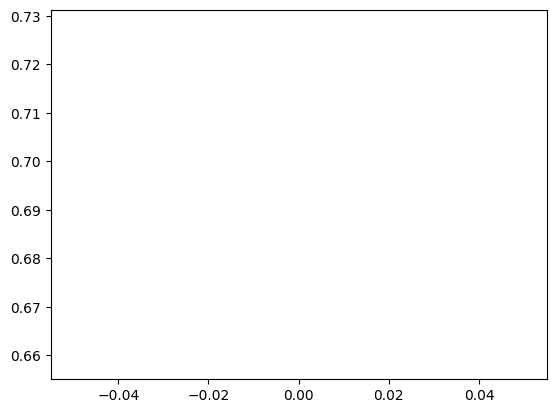

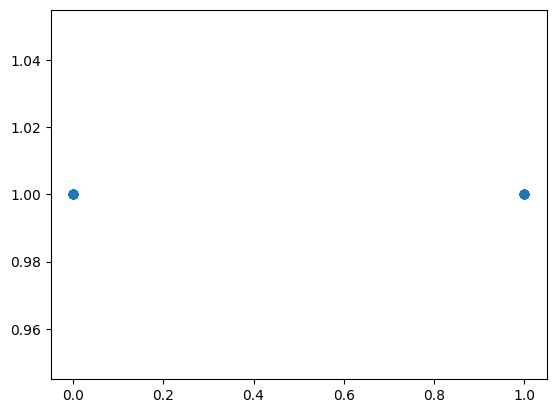

In [43]:
fig, ax = plt.subplots()
ax.plot(cost_iterations)
plt.show()


y_pred = predict(w, b, x_test)
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, label="Predicted")
plt.show()

Evaluation Metrics
auc roc score:  0.5
Accuracy    : 0.43333333333333335
Precision   : 0.43333333333333335
Recall      : 1.0
F1-score    : 0.6046511627906976


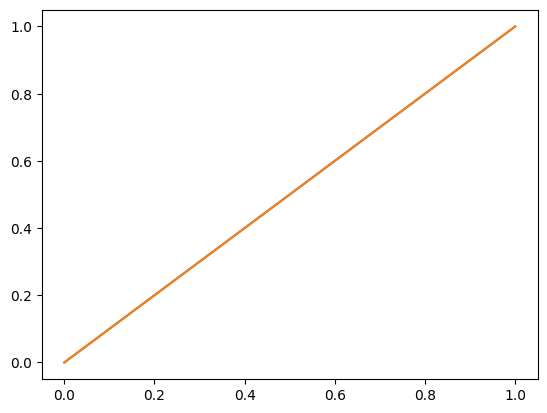

In [44]:
conf_mat = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rocAuc = roc_auc_score(y_test, y_pred)

print("Evaluation Metrics")
print("==================")
print(f"auc roc score:  {rocAuc}")
print(f"Accuracy    : {accuracy}")
print(f"Precision   : {precision}")
print(f"Recall      : {recall}")
print(f"F1-score    : {f1}")

fpr, tpr, threshold = roc_curve(y_test, y_pred)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1])

plt.show()
